In [61]:
%matplotlib inline
import numpy as np
import pandas as pd
# The statistical module used to run chi square test
import scipy.stats as stats
from scipy.stats import linregress
import matplotlib.pyplot as plt


In [58]:
weather_df = pd.read_csv("weatherdatacsv.csv")
weather_df["Temp"]=pd.to_numeric(weather_df["Temp"], errors='coerce')
weather_df = weather_df.dropna()

In [59]:
death_df = pd.read_csv("masterdeathfile.csv")
len(death_df)


7455

In [60]:
left_key=["County", "Year", "Month"]
right_key = ["County", "Year", "Month"]
result_df=death_df.merge(weather_df, left_on=left_key, right_on=right_key, how='inner')
result_df.count()
#result_df.to_csv("resultsfile.csv")

County              5312
Month               5312
Year                5312
Deaths              5312
TenYearAgeGroups    5312
City                5312
Temp                5312
dtype: int64

In [111]:
group1=result_df.loc[(result_df["TenYearAgeGroups"]=="85+") & (result_df["County"]=="Hennepin"),:]
group2 = result_df.loc[(result_df["TenYearAgeGroups"]=="75-84") & (result_df["County"]=="Hennepin"),:]
group3 = result_df.loc[(result_df["TenYearAgeGroups"]=="65-74") & (result_df["County"]=="Hennepin"),:]
group3.head()

,County,Month,Year,Deaths,TenYearAgeGroups,City,Temp
131,Hennepin,1,2007,89,65-74,Minneapolis,19.6
134,Hennepin,2,2007,79,65-74,Minneapolis,13.5
137,Hennepin,3,2007,91,65-74,Minneapolis,38.4
140,Hennepin,4,2007,74,65-74,Minneapolis,47.2
143,Hennepin,5,2007,79,65-74,Minneapolis,64.1


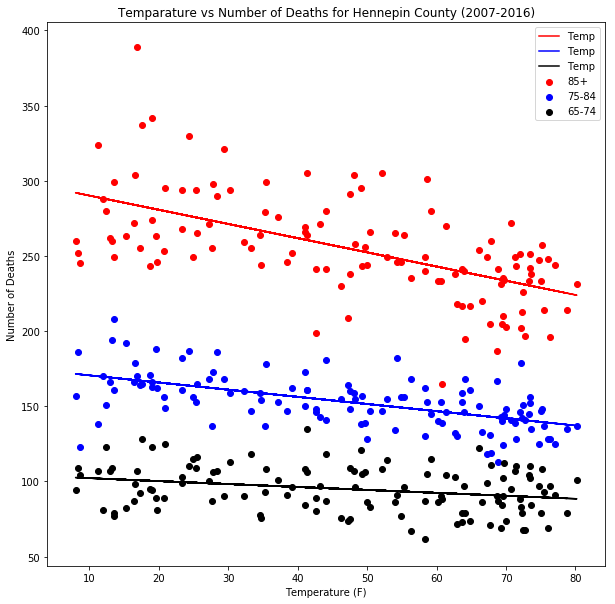

<Figure size 432x288 with 0 Axes>

In [112]:
plt.figure(figsize=(10,10))
plt.scatter(x=group1["Temp"], y=group1["Deaths"], color = "red", label = "85+")
plt.scatter(x=group2["Temp"], y=group2["Deaths"], color = "blue",label = "75-84")
plt.scatter(x=group3["Temp"], y=group3["Deaths"], color = "black",label = "65-74")
(slope1, intercept1, residual1, pvalue1, stderr1) = linregress(group1["Temp"], group1["Deaths"])
fit1 = slope1 * group1["Temp"] + intercept1
plt.plot(group1["Temp"], fit1, 'red')
(slope2, intercept2, residual2, pvalue2, stderr2) = linregress(group2["Temp"], group2["Deaths"])
fit2 = slope2 * group2["Temp"] + intercept2
plt.plot(group2["Temp"], fit2, 'blue')
(slope3, intercept3, residual3, pvalue3, stderr3) = linregress(group3["Temp"], group3["Deaths"])
fit3 = slope3 * group3["Temp"] + intercept3
plt.plot(group3["Temp"], fit3, 'black')
plt.xlabel("Temperature (F)")
plt.ylabel("Number of Deaths")
plt.title("Temparature vs Number of Deaths for Hennepin County (2007-2016)")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
plt.savefig("HennepinByAge.png")

In [113]:
print(f"Linear regression p-value for 85+: {pvalue1}")
print(f"Linear regression p-value for 75-84: {pvalue2}")
print(f"Linear regression p-value for 65-74: {pvalue3}")

Linear regression p-value for 85+: 1.8865588663789013e-12
Linear regression p-value for 75-84: 3.482854894128807e-12
Linear regression p-value for 65-74: 0.0023463837076098293


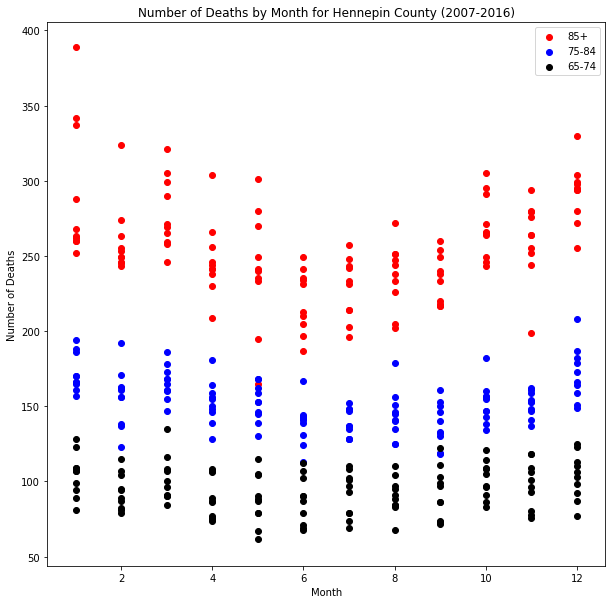

<Figure size 432x288 with 0 Axes>

In [114]:
plt.figure(figsize=(10,10))
plt.scatter(x=group1["Month"], y=group1["Deaths"], color = "red", label = "85+")
plt.scatter(x=group2["Month"], y=group2["Deaths"], color = "blue",label = "75-84")
plt.scatter(x=group3["Month"], y=group3["Deaths"], color = "black",label = "65-74")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.title("Number of Deaths by Month for Hennepin County (2007-2016)")
plt.legend()
plt.show()
plt.savefig("HennepinByMonth.png")

In [101]:
mn_temp= weather_df.groupby(["Year", "Month"], as_index=False)["Temp"].mean()
mn_death= death_df.groupby(["Year", "Month","TenYearAgeGroups"], as_index=False)["Deaths"].sum()
left_key=["Year", "Month"]
right_key = ["Year", "Month"]
mn_df=mn_death.merge(mn_temp, on = ["Year", "Month"], how='inner')
mn_df.head()

,Year,Month,TenYearAgeGroups,Deaths,Temp
0,2007,1,65-74,236,16.822222
1,2007,1,75-84,668,16.822222
2,2007,1,85+,1039,16.822222
3,2007,2,65-74,230,9.352174
4,2007,2,75-84,520,9.352174
5,2007,2,85+,874,9.352174
6,2007,3,65-74,309,33.645652
7,2007,3,75-84,581,33.645652
8,2007,3,85+,974,33.645652
9,2007,4,65-74,219,43.013043


In [102]:
group10=mn_df.loc[(mn_df["TenYearAgeGroups"]=="85+"),:]
group20 = mn_df.loc[(mn_df["TenYearAgeGroups"]=="75-84"),:]
group30 = mn_df.loc[(mn_df["TenYearAgeGroups"]=="65-74"),:]
group30.head()

,Year,Month,TenYearAgeGroups,Deaths,Temp
0,2007,1,65-74,236,16.822222
3,2007,2,65-74,230,9.352174
6,2007,3,65-74,309,33.645652
9,2007,4,65-74,219,43.013043
12,2007,5,65-74,206,60.617391


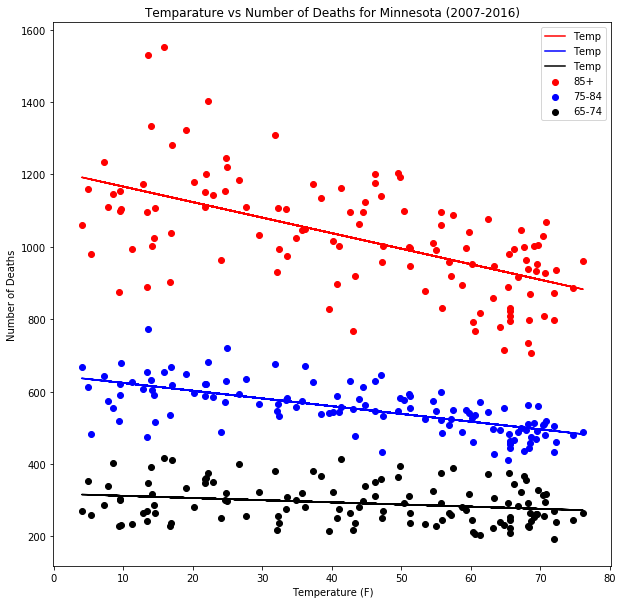

<Figure size 432x288 with 0 Axes>

In [109]:
plt.figure(figsize=(10,10))
plt.scatter(x=group10["Temp"], y=group10["Deaths"], color = "red", label = "85+")
plt.scatter(x=group20["Temp"], y=group20["Deaths"], color = "blue",label = "75-84")
plt.scatter(x=group30["Temp"], y=group30["Deaths"], color = "black",label = "65-74")
(slope10, intercept10, residual10, pvalue10, stderr10) = linregress(group10["Temp"], group10["Deaths"])
fit10 = slope10 * group10["Temp"] + intercept10
plt.plot(group10["Temp"], fit10, 'red')
(slope20, intercept20, residual20, pvalue20, stderr20) = linregress(group20["Temp"], group20["Deaths"])
fit20 = slope20 * group20["Temp"] + intercept20
plt.plot(group20["Temp"], fit20, 'blue')
(slope30, intercept30, residual30, pvalue30, stderr30) = linregress(group30["Temp"], group30["Deaths"])
fit30 = slope30 * group30["Temp"] + intercept30
plt.plot(group30["Temp"], fit30, 'black')
plt.xlabel("Temperature (F)")
plt.ylabel("Number of Deaths")
plt.title("Temparature vs Number of Deaths for Minnesota (2007-2016)")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
plt.savefig("MinnesotaByAge.png")

In [105]:
print(f"Linear regression p-value for 85+: {pvalue10}")
print(f"Linear regression p-value for 75-84: {pvalue20}")
print(f"Linear regression p-value for 65-74: {pvalue30}")

Linear regression p-value for 85+: 2.0856397505090483e-12
Linear regression p-value for 75-84: 1.499808106007286e-16
Linear regression p-value for 65-74: 0.010716764113832142


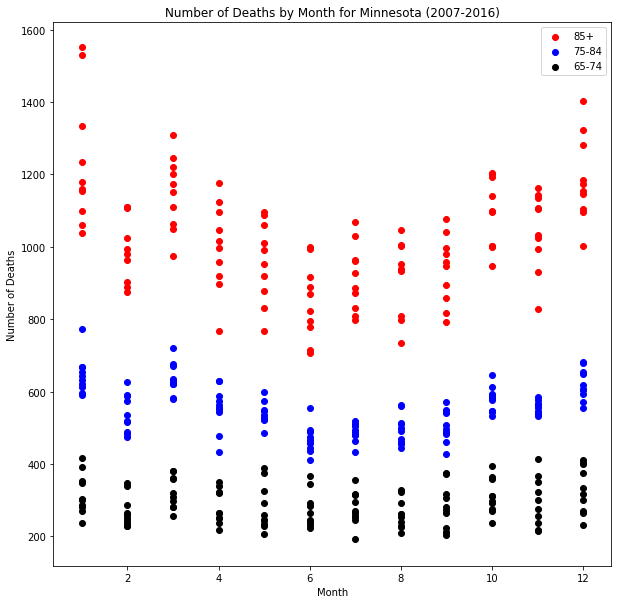

<Figure size 432x288 with 0 Axes>

In [110]:
plt.figure(figsize=(10,10))
plt.scatter(x=group10["Month"], y=group10["Deaths"], color = "red", label = "85+")
plt.scatter(x=group20["Month"], y=group20["Deaths"], color = "blue",label = "75-84")
plt.scatter(x=group30["Month"], y=group30["Deaths"], color = "black",label = "65-74")
plt.xlabel("Month")
plt.ylabel("Number of Deaths")
plt.title("Number of Deaths by Month for Minnesota (2007-2016)")
plt.legend()
plt.show()
plt.savefig("MinnesotaByMonth.png")